In [ ]:
import pandas as pd

In [ ]:
# Load the uploaded dataset
df = pd.read_csv('/content/retail_sales_dataset.csv')

In [ ]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


(None,
    Transaction ID        Date Customer ID  Gender  Age Product Category  \
 0               1  2023-11-24     CUST001    Male   34           Beauty   
 1               2  2023-02-27     CUST002  Female   26         Clothing   
 2               3  2023-01-13     CUST003    Male   50      Electronics   
 3               4  2023-05-21     CUST004    Male   37         Clothing   
 4               5  2023-05-06     CUST005    Male   30           Beauty   
 
    Quantity  Price per Unit  Total Amount  
 0         3              50           150  
 1         2             500          1000  
 2         1              30            30  
 3         1             500           500  
 4         2              50           100  )

Dataset Overview

| Column Name        | Description                         |
| ------------------ | ----------------------------------- |
| `Transaction ID`   | Unique transaction identifier       |
| `Date`             | Purchase date (`YYYY-MM-DD`)        |
| `Customer ID`      | Unique customer ID                  |
| `Gender`           | Male or Female                      |
| `Age`              | Age of the customer                 |
| `Product Category` | e.g., Beauty, Clothing, Electronics |
| `Quantity`         | Number of units purchased           |
| `Price per Unit`   | Cost of one unit                    |
| `Total Amount`     | Total = Quantity × Price per Unit   |


Step 1: Clean & Prepare Data in Python
We'll:

Convert the Date column to datetime

Ensure all totals are correct (Quantity * Price)

Handle duplicates or inconsistencies if any

In [ ]:
# Step 1: Clean and prepare the dataset

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verify Total Amount is correct (sanity check)
df['Calculated Total'] = df['Quantity'] * df['Price per Unit']
discrepancies = df[df['Calculated Total'] != df['Total Amount']]

# Check for duplicates
duplicates = df.duplicated().sum()

# Drop temporary column for cleanliness
df.drop(columns='Calculated Total', inplace=True)

# Summary of cleaning step
{
    "Discrepant Rows in Total Amount": len(discrepancies),
    "Duplicate Rows": duplicates,
    "Null Values": df.isnull().sum().to_dict(),
    "Data Types": df.dtypes.to_dict()
}


{'Discrepant Rows in Total Amount': 0,
 'Duplicate Rows': np.int64(0),
 'Null Values': {'Transaction ID': 0,
  'Date': 0,
  'Customer ID': 0,
  'Gender': 0,
  'Age': 0,
  'Product Category': 0,
  'Quantity': 0,
  'Price per Unit': 0,
  'Total Amount': 0},
 'Data Types': {'Transaction ID': dtype('int64'),
  'Date': dtype('<M8[ns]'),
  'Customer ID': dtype('O'),
  'Gender': dtype('O'),
  'Age': dtype('int64'),
  'Product Category': dtype('O'),
  'Quantity': dtype('int64'),
  'Price per Unit': dtype('int64'),
  'Total Amount': dtype('int64')}}

Data Cleaning Complete!

No missing values in any column

No duplicate rows

All Total Amount = Quantity × Price values are correct

Date column is now converted to datetime

#Step 2 – Exploratory Data Analysis (EDA)
We’ll now generate insights like:

1.Monthly sales trend

2.Top product categories by sales

3.Gender-based purchase behavior

4.Age group analysis

#1.Monthly sales trend

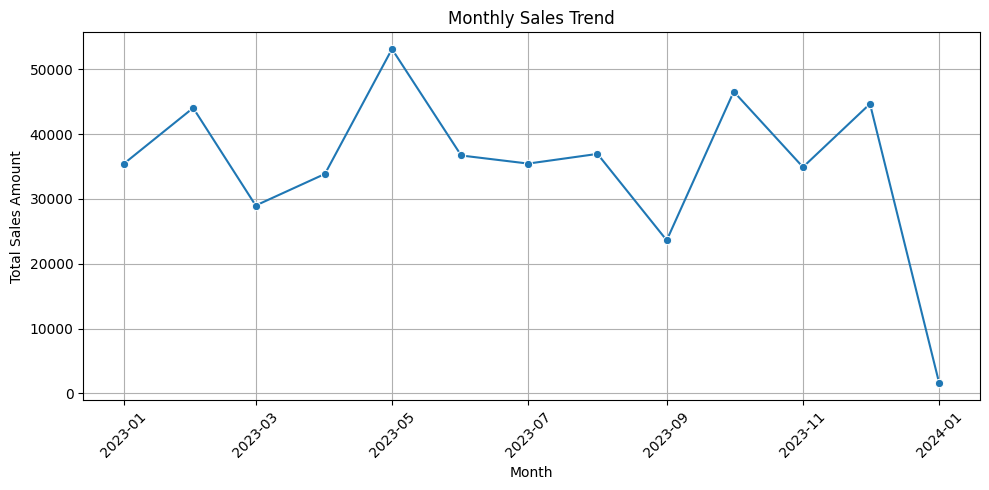

In [ ]:
# Group by month and sum Total Amount
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

# Plotting the monthly sales trend
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Date', y='Total Amount', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


Monthly Sales Trend Analysis

From the line chart above, you can observe:

*   Sales volume fluctuations across different months
*  Identify any seasonal peaks (e.g., festive or year-end spikes)
*   Spot any low-performing months for business insight





#2.Top product categories by sales

/tmp/ipython-input-14-151531719.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=category_sales, x='Product Category', y='Total Amount', palette='viridis')


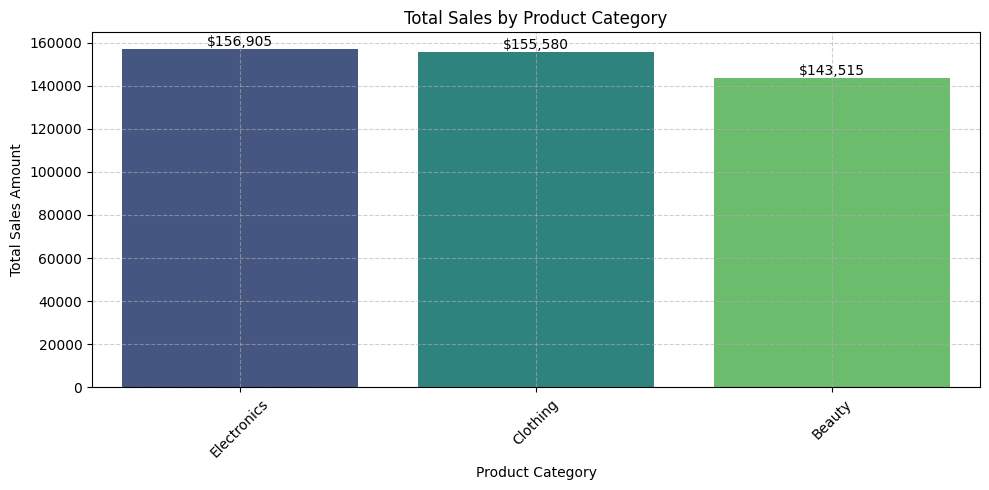

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=category_sales, x='Product Category', y='Total Amount', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)  # Optional: Make grid lines lighter

# Add labels to each bar
for p in ax.patches:
    ax.annotate(
        f'${p.get_height():,.0f}',  # Format with dollar sign and commas
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

plt.show()



#Insights
*   Electronics and Clothing generates most revenue
*   Beauty category geberates $143,515 which has lower margins or growth potential, target promotions or bundles to boost sales.



#3.Gender-Based Sales Comparison

/tmp/ipython-input-15-2711841959.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=gender_sales, x='Gender', y='Total Amount', palette='pastel')


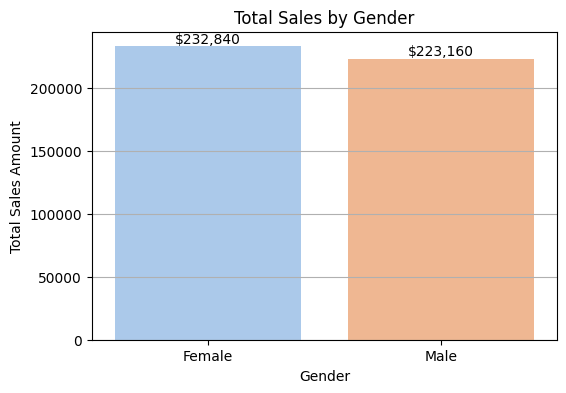

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by gender
gender_sales = df.groupby('Gender')['Total Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=gender_sales, x='Gender', y='Total Amount', palette='pastel')
plt.title('Total Sales by Gender')
plt.ylabel('Total Sales Amount')
plt.grid(True, axis='y')

# Add labels (simplest method)
for index, value in enumerate(gender_sales['Total Amount']):
    ax.text(index, value, f'${value:,.0f}', ha='center', va='bottom')

plt.show()

#Observations:
Near-Equal Spending:

Female: $232,840

Male: $223,160
Purchases are balanced (only ~4% difference), suggesting neither gender dominates.

#4. Age-Wise Sales Analysis

/tmp/ipython-input-17-634826287.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()
/tmp/ipython-input-17-634826287.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=age_sales, x='Age Group', y='Total Amount', palette='coolwarm')


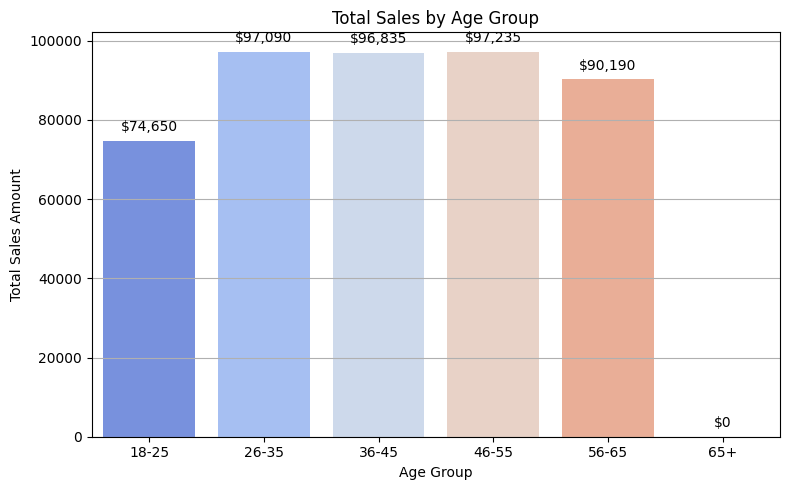

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create age bins
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group
age_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=age_sales, x='Age Group', y='Total Amount', palette='coolwarm')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.grid(True, axis='y')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.tight_layout()  # Ensures labels don't get cut off
plt.show()

#Observations:

Top Buyers:
1.   36-45 leads with $97,235 (though all groups are within ~$400 of each other).


2.  18-25 and 26-35 follow closely (~$97K each), showing balanced spending across younger demographics.



In [ ]:
# Export the cleaned dataset to Excel for use in PivotTables
excel_output_path = "/content/retail_sales_dataset.xlsx" # Changed file extension to .xlsx
df.to_excel(excel_output_path, index=False)

excel_output_path

'/content/retail_sales_dataset.xlsx'